In [144]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier      # 분류
# from sklearn.neighbors import KNeighborsRegressor       # 회귀 예측
# from sklearn.linear_model import LinearRegression       # 선형 회귀
# from sklearn.preprocessing import PolynomialFeatures    # 다항특성을 만들어주는 라이브러리
# from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
import random
import glob,os.path,re
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [145]:
picher = pd.read_csv('../z20_data/picher_stats_2017.csv')
picher

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [146]:
###         데이터 확인 (결과값)
#            - hist 그래프 
#            - corr hitmap
#            - subplots (0 데이터가 어느정도 있는지, 데이터 분포가 어떻게 되는지)
#           각 피처 중 비슷한 피처는 삭제하면 좋음

In [147]:
picher['연봉(2018)'].sort_values()

103      2700
93       2700
115      2700
82       2800
105      2800
        ...  
4      111000
20     120000
1      120000
0      140000
2      230000
Name: 연봉(2018), Length: 152, dtype: int64

<Axes: >

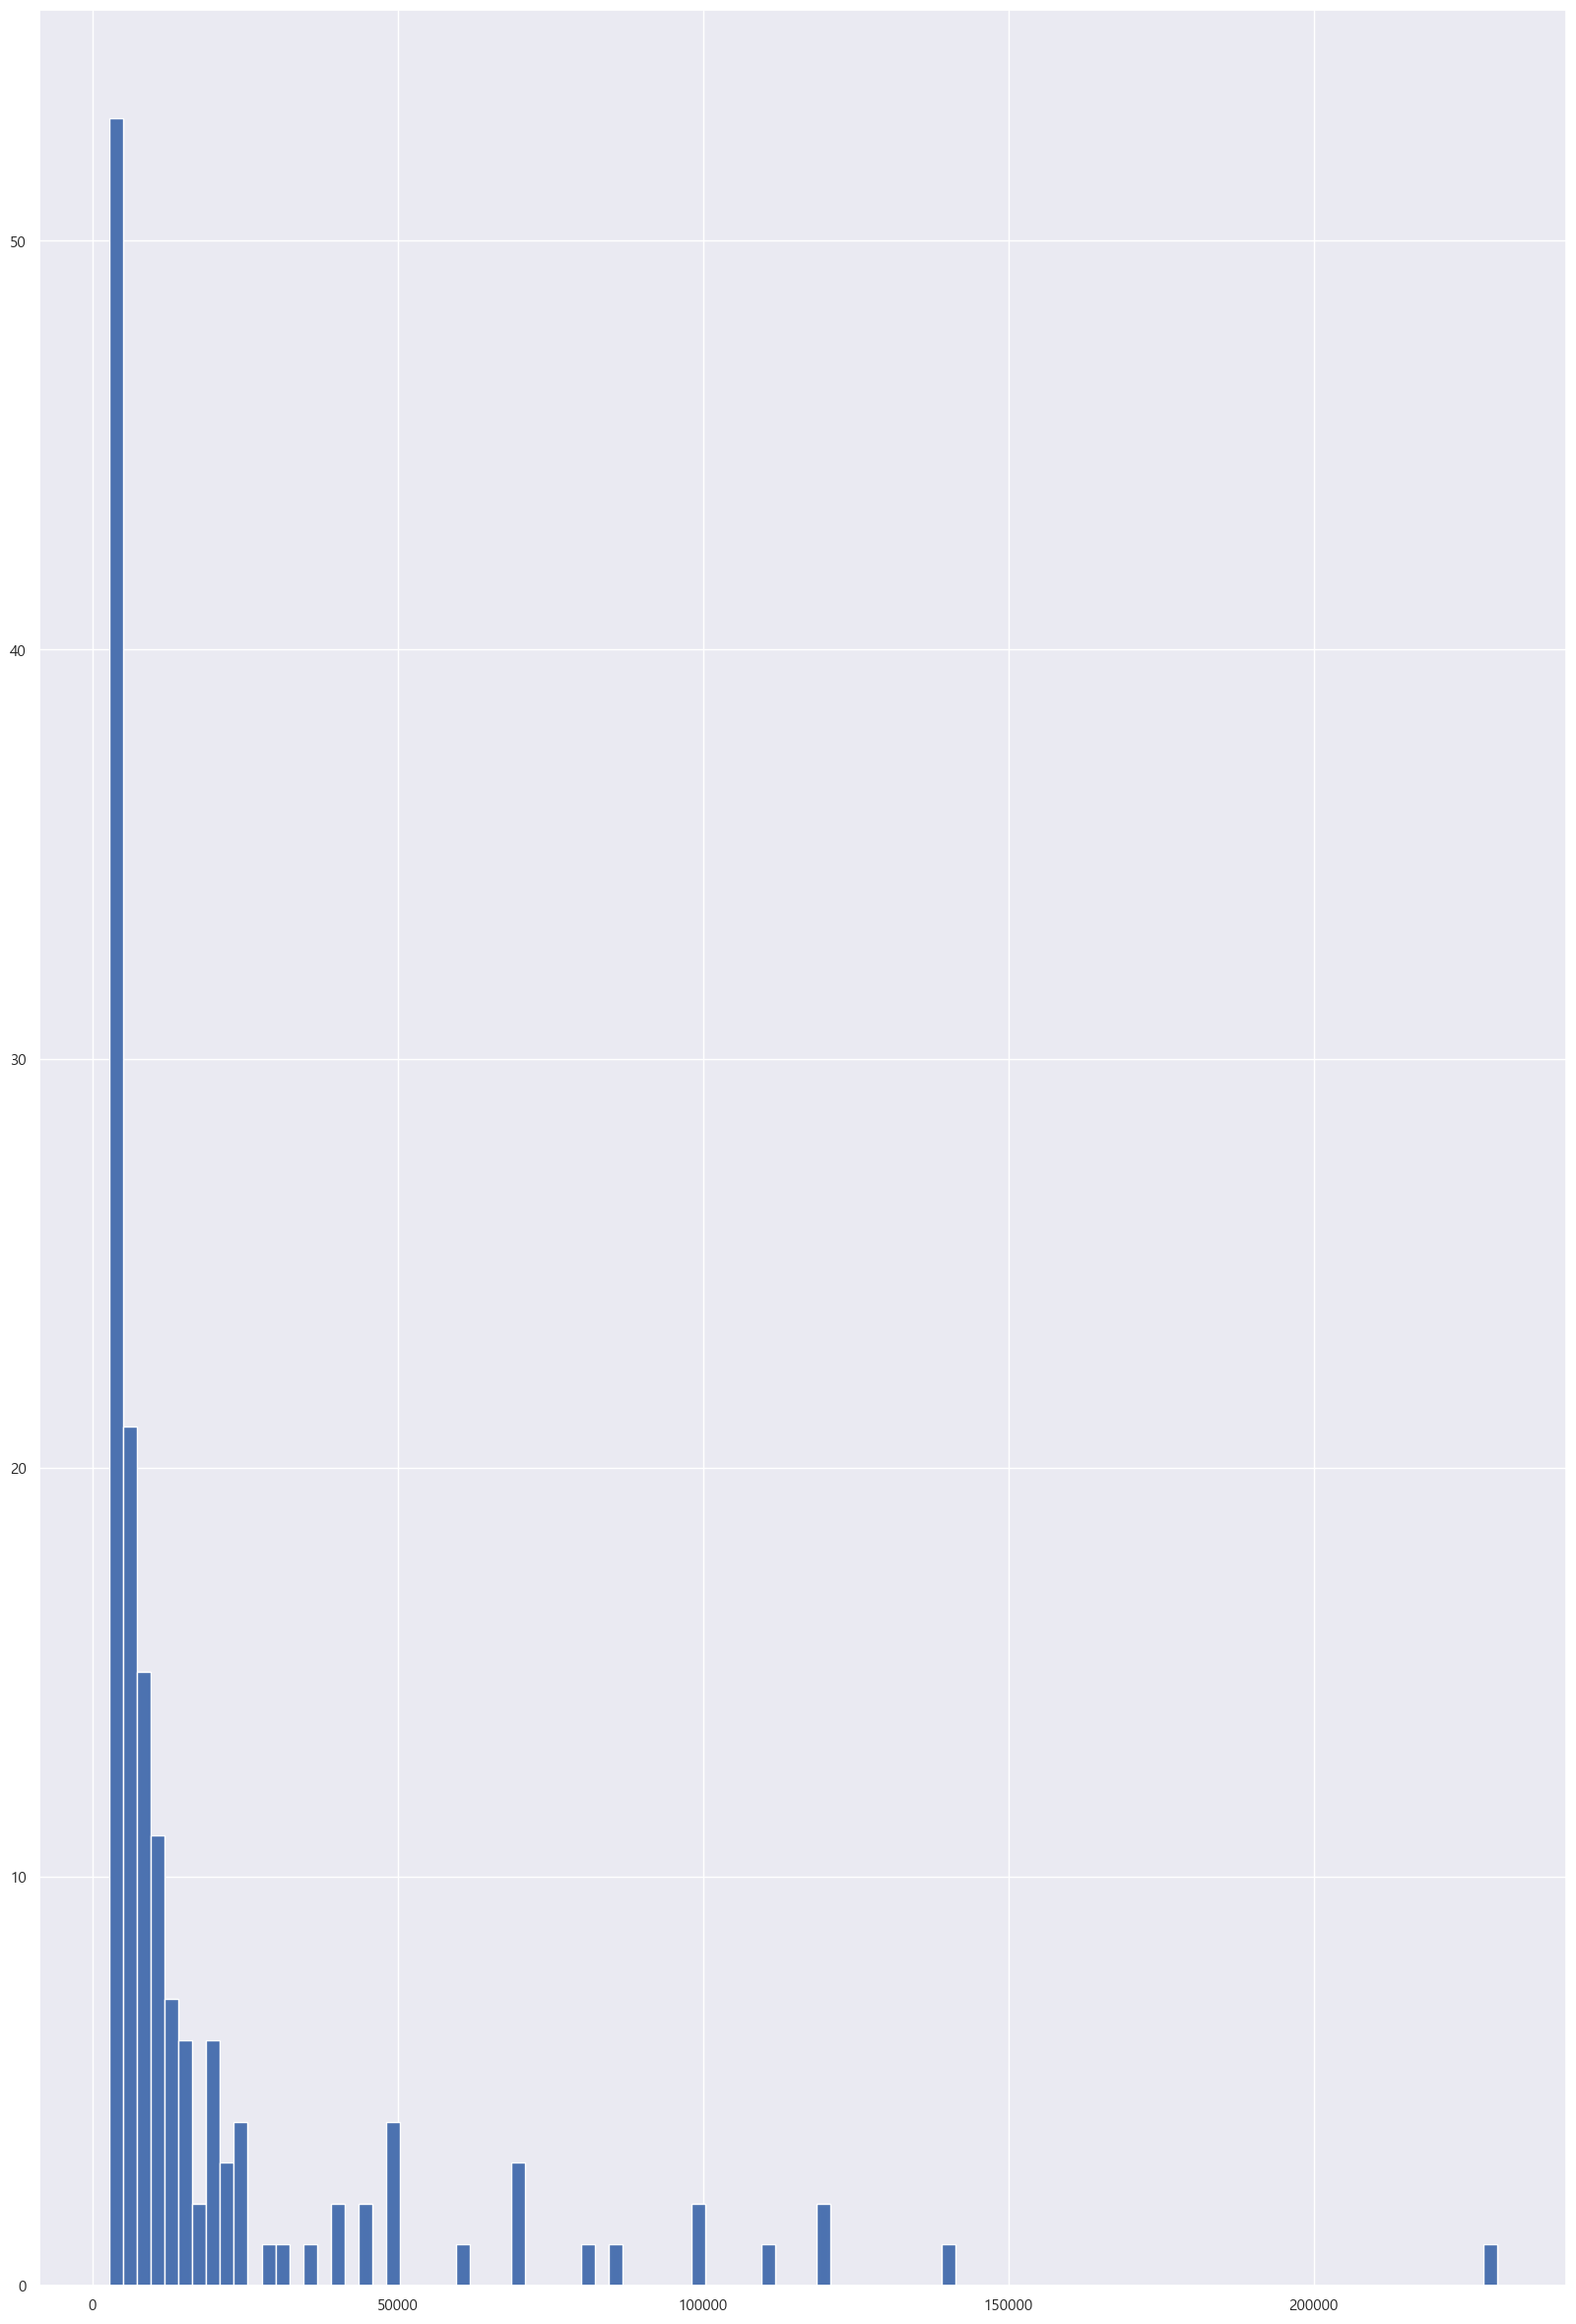

In [148]:
picher['연봉(2018)']
# plt.bar(picher.index,picher['연봉(2018)'])
# plt.ylim(0,500000)
picher['연봉(2018)'].hist(bins=100)

<Axes: >

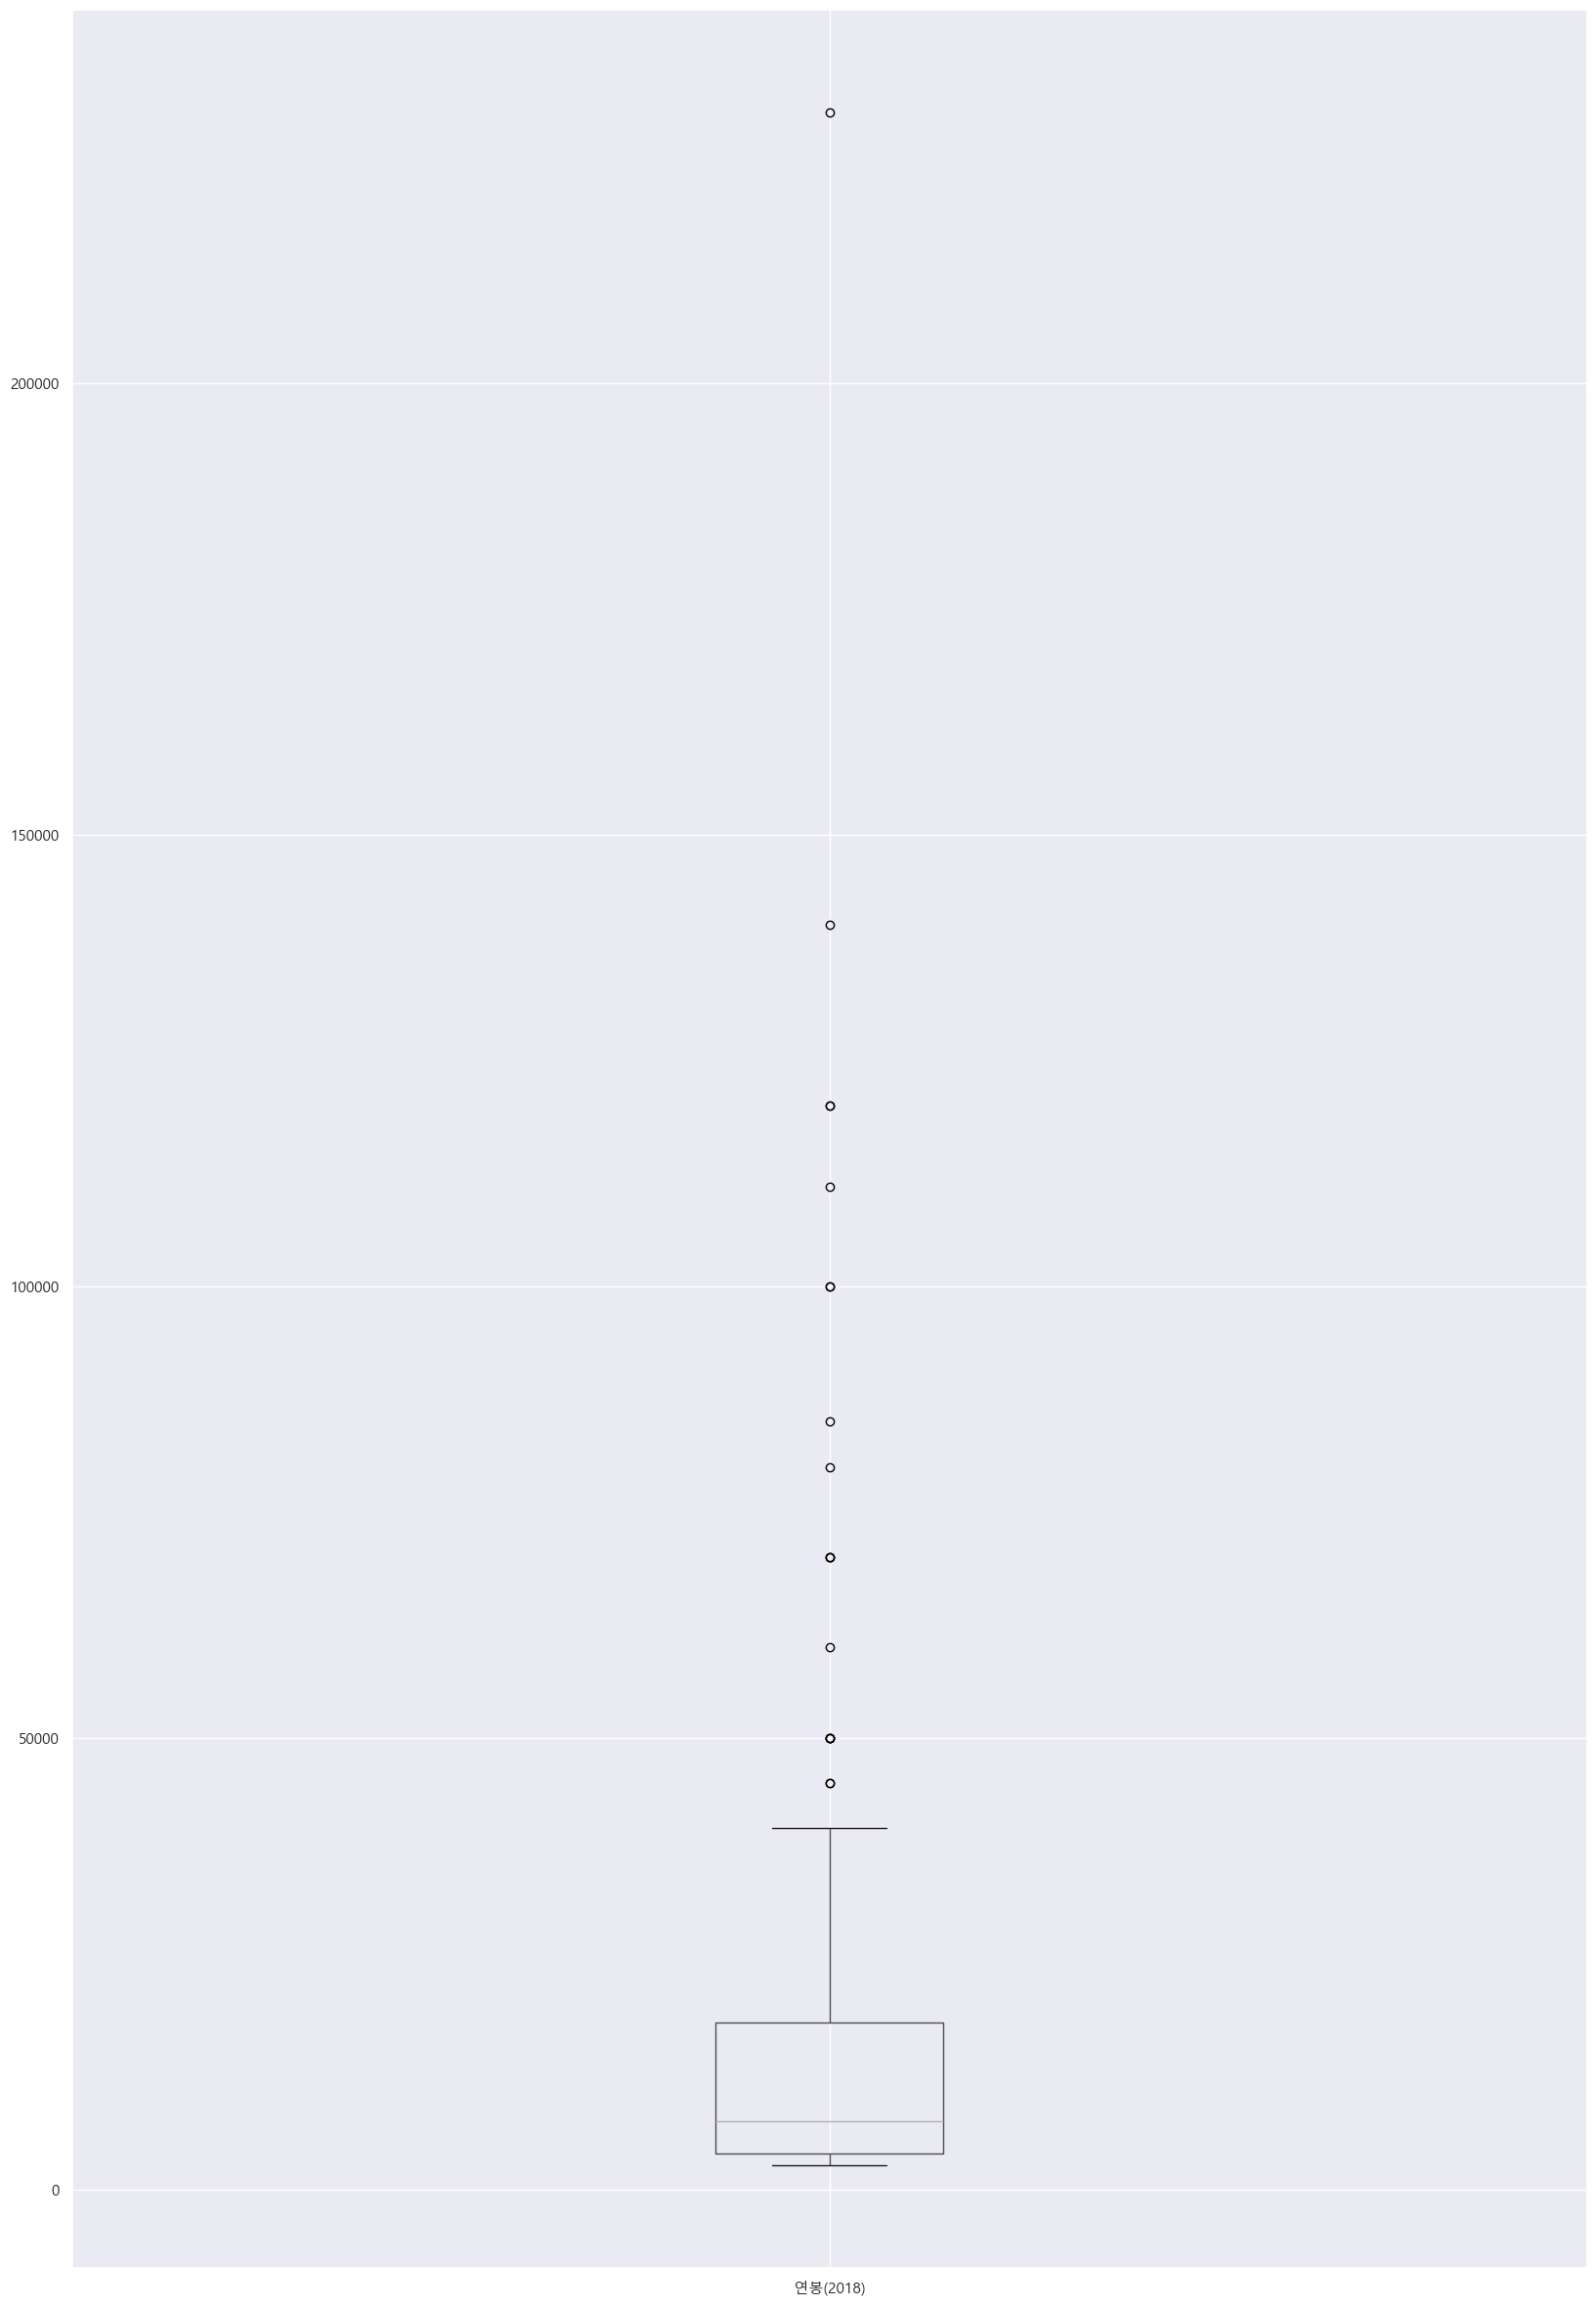

In [149]:
picher.boxplot(column=['연봉(2018)'])

In [150]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [151]:
# picher_features_df : 선수명,팀명 제외
picher_features_df = picher.iloc[:,2:]
picher_features_df

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


<Axes: >

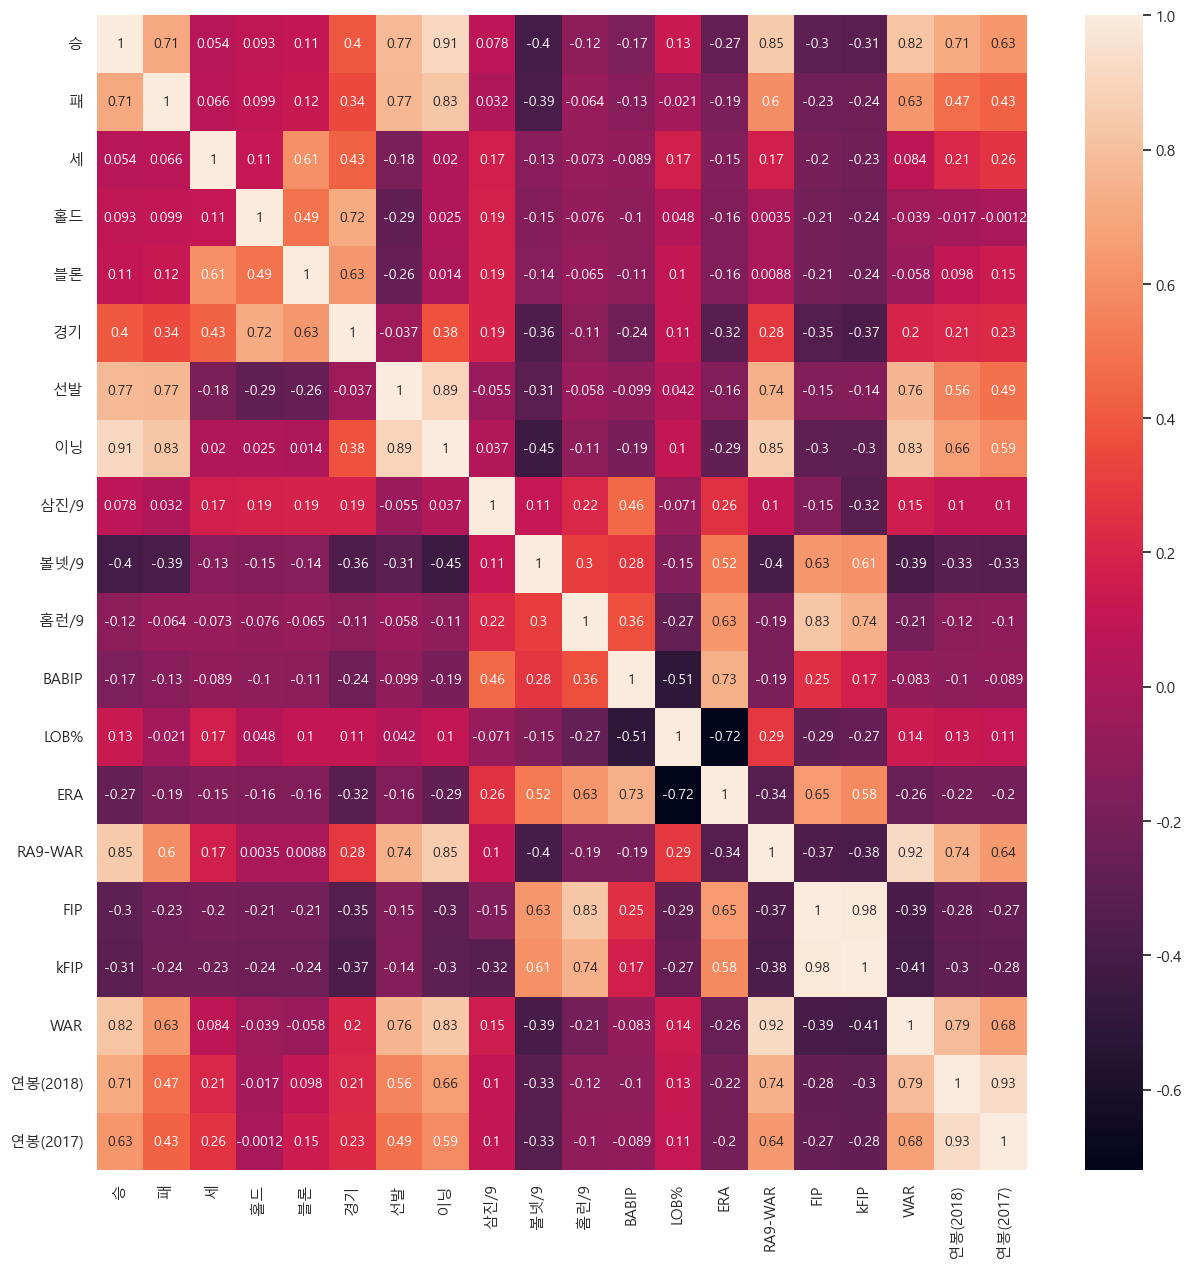

In [152]:
import seaborn as sns
plt.figure(figsize=(15,15))

# df2
sns.heatmap(picher.iloc[:,2:].corr(),annot=True)

<Axes: >

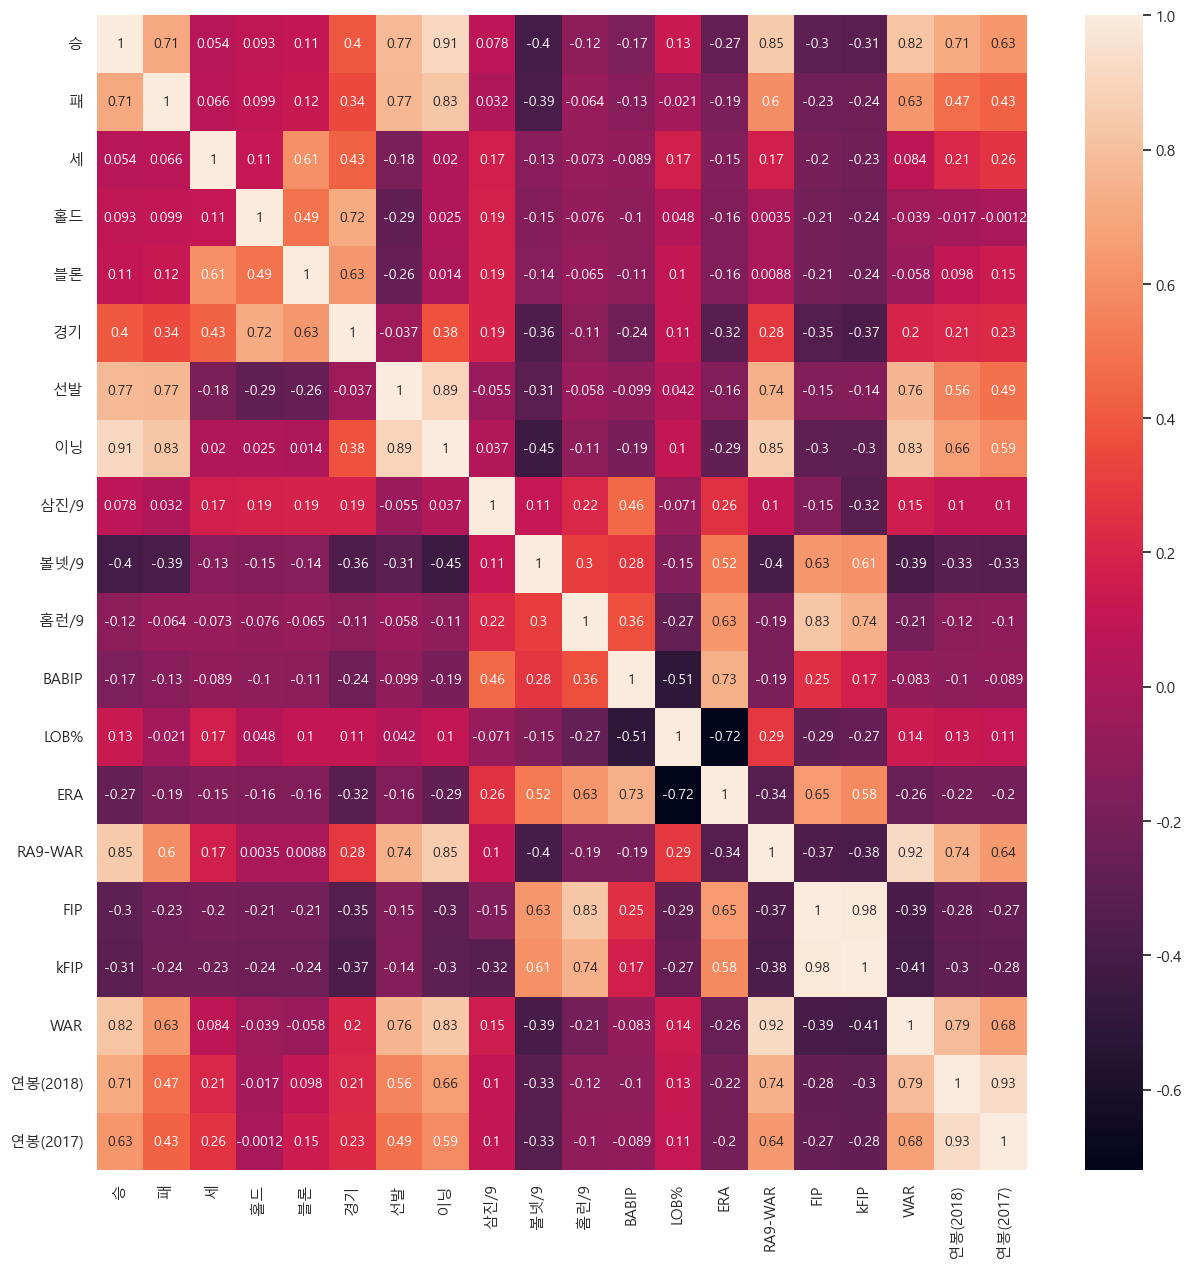

In [153]:
import seaborn as sns
# method : pearson,kendall,spearman
corr = picher_features_df.corr(method='pearson')
show_cols=picher_features_df.columns
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,15))
# plt.tight_layout()
# sns.set(font_scale=1)
sns.heatmap(corr.values,
            yticklabels=show_cols,
            xticklabels=show_cols,annot=True)
# plt.show()

In [154]:
# 함수 사용해서 각각 그래프 출력
def plot_hist_each_column(df):
    # plt.figure(figsize=(20,20))
    plt.rcParams['figure.figsize']=[20,30]
    matplotlib.rcParams['font.family'] = 'Malgun Gothic'
    fig = plt.figure(1)
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]],bins=50) # bins : 그래프 폭
        ax.set_title(df.columns[i]) # 컬럼명을 타이틀로 사용

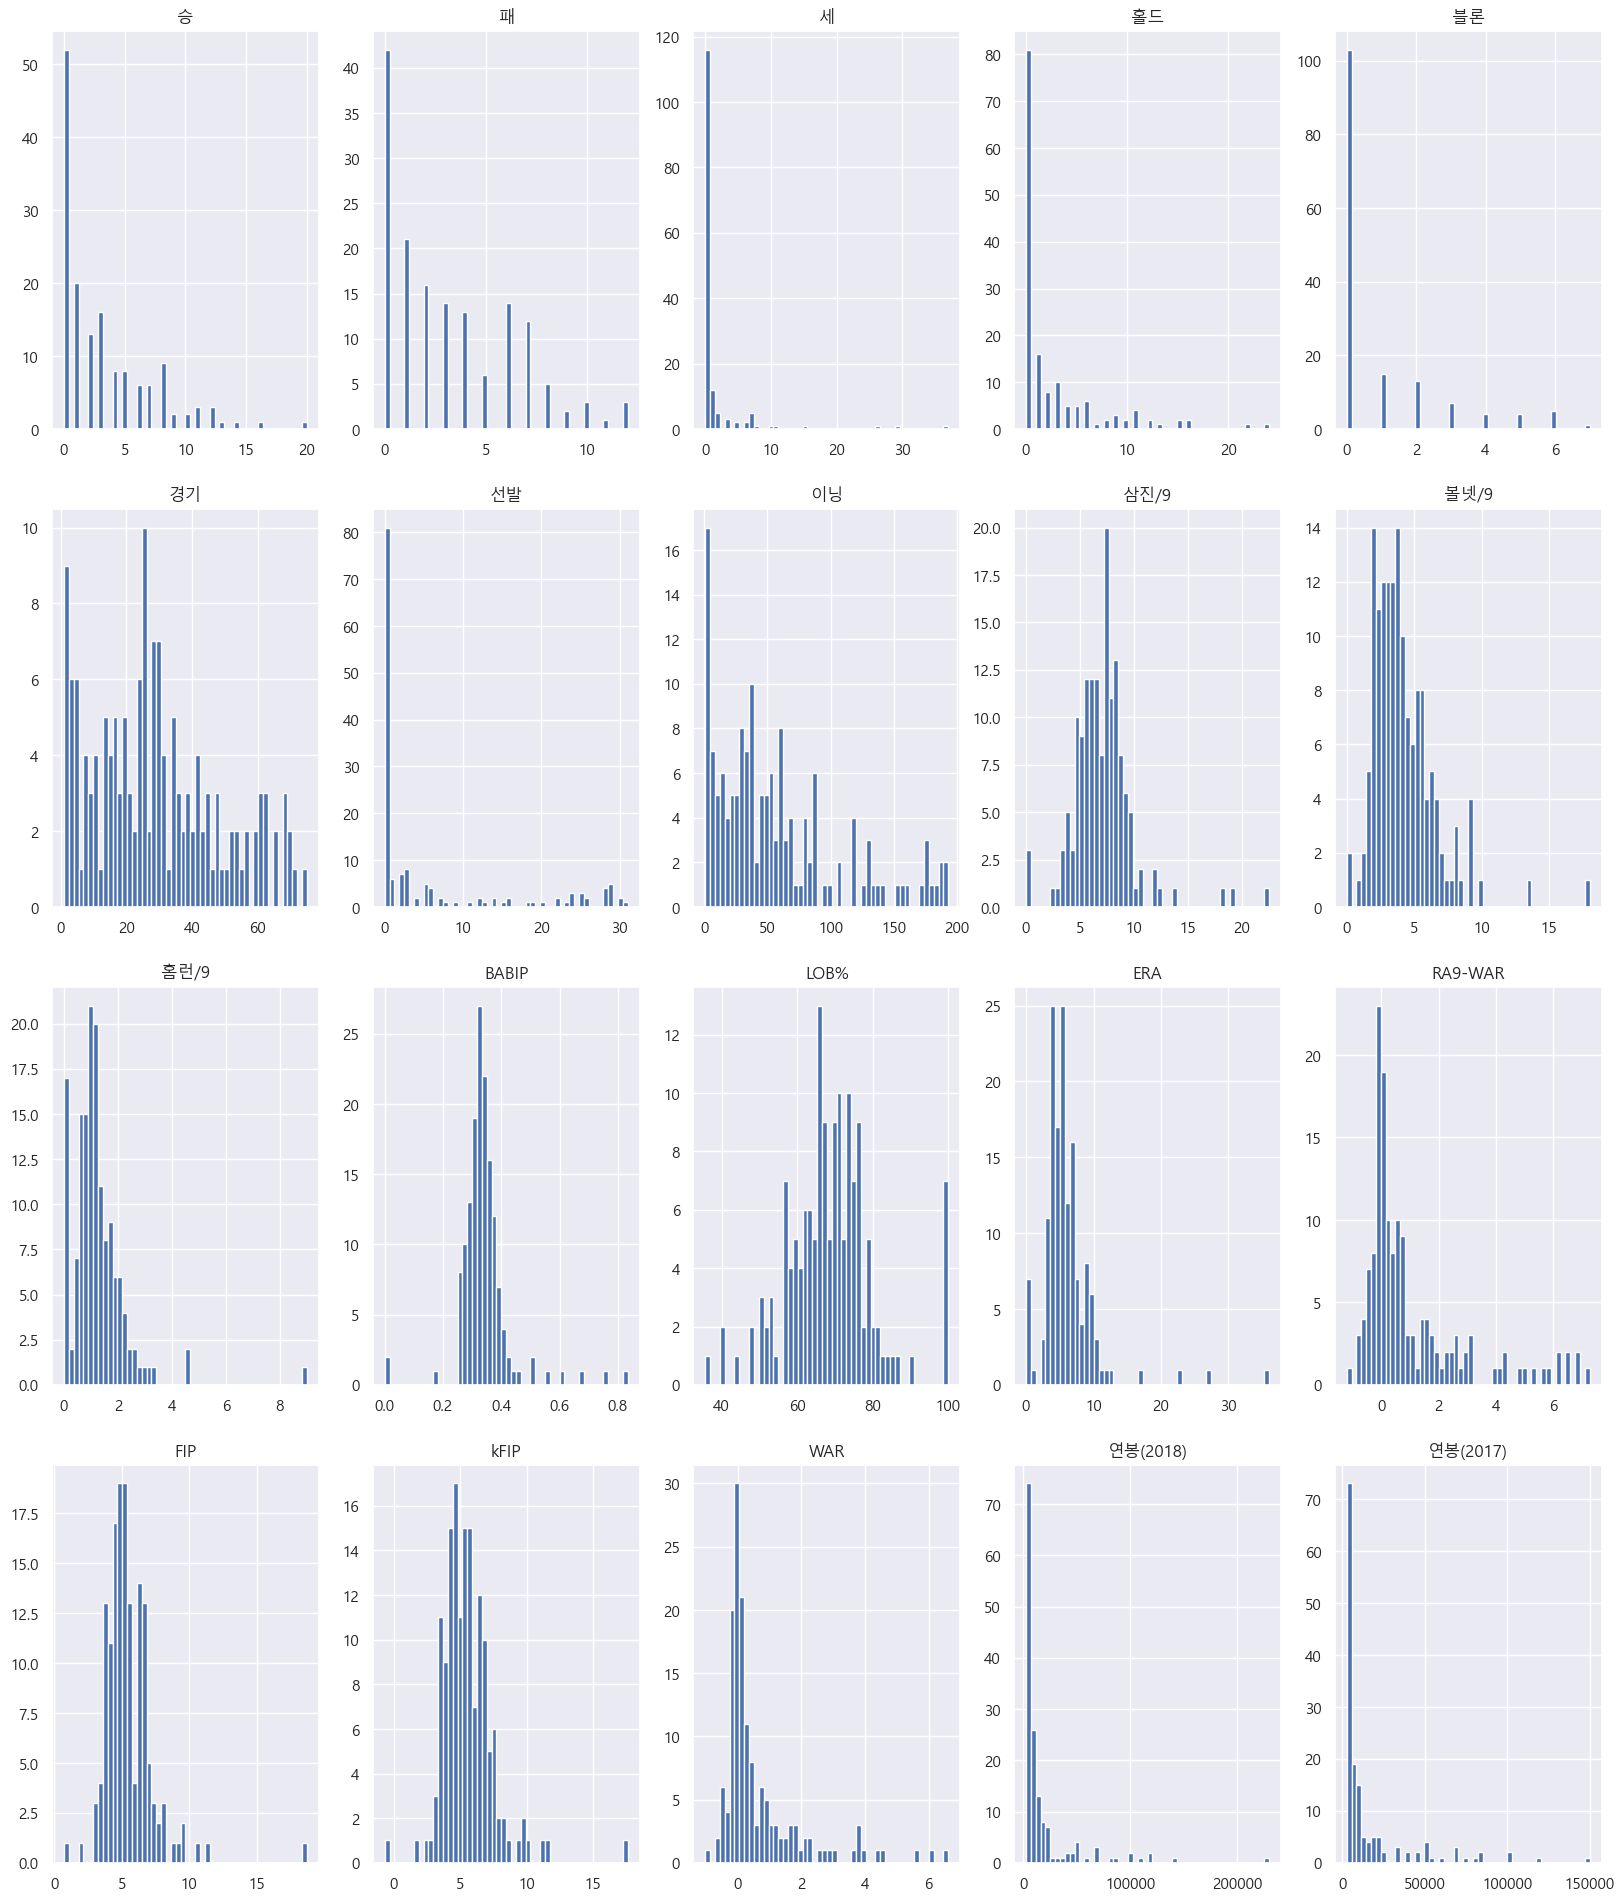

In [155]:
plot_hist_each_column(picher_features_df)

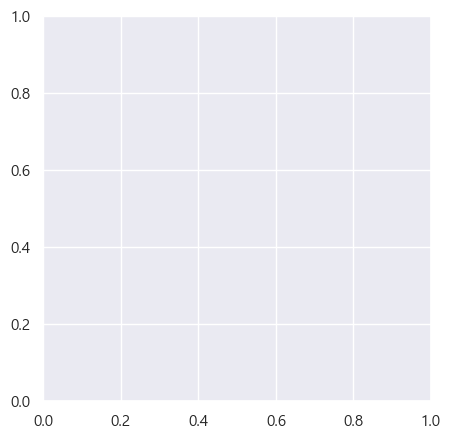

In [156]:
# subplot 여러개의 hist 출력 (5 * 5)
# subplot, subplots, add_subplot, subplot2grid
fig,axs = plt.subplots(figsize=(5,5))

In [157]:
plt.figure(1)

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

전처리

In [158]:
# picher : 모든 컬럼
# picher_fratures_df : 이름, 팀명 없는 컬럼
# picher_y_df : 이름, 팀명, 연봉(2018) 제외
# picher_y_scaled_df : 선수명, 팀명, 연봉(2018) 제외 후 표준화 작업
# picher_y_scaled_nt_df : 선수명, 팀명 포함 후 표준화작업

# 데이터 전처리
picher_result = picher['연봉(2018)']
picher_result
picher_y_df = picher_features_df.drop('연봉(2018)',axis=1)
picher_y_df


,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


In [159]:
# from sklearn.model_selection import train_test_split
# train_input, test_input, train_target, test_target = train_test_split(picher_y_df,picher_result,random_state=42)

In [160]:
# 팀명 추가

In [161]:
# 표준화 작업
# picher_y_scaled_df : 선수명, 팀명, 연봉(2018) 제외 후 표준화 작업
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(picher_y_df)
picher_y_scaled_df = ss.transform(picher_y_df)


In [162]:
picher_y_scaled_df[:5]
df_numpy = pd.DataFrame(picher_y_scaled_df)
df_numpy.columns = picher_y_df.columns
df_numpy.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746


In [163]:
# 선수명, 팀명 합치기
# concat : 두 dataframe 합치기
picher_y_scaled_nt_df = pd.concat([picher.iloc[:,:2],df_numpy],axis=1)
picher_y_scaled_nt_df




,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,켈리,SK,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,...,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,소사,LG,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,...,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,양현종,KIA,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,...,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,차우찬,LG,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,...,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,레일리,롯데,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,...,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,...,-0.375064,0.365057,0.163412,-1.006027,0.412709,-1.233602,0.377052,0.477566,-0.861951,-0.336696
148,정용운,KIA,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,...,0.605813,-0.147905,-0.873882,-0.270312,-0.030353,-0.362917,0.484298,0.624396,-0.877127,-0.536985
149,노경은,롯데,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,...,0.308578,1.223282,0.467836,-1.360901,1.351808,-1.026814,1.352985,1.393990,-0.968185,-0.020240
150,김승현,삼성,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,...,1.200284,0.226952,0.005563,0.465402,-0.066472,-0.792818,0.730962,0.715532,-1.036478,-0.544996


In [164]:
# 팀명 추가 ---   |원 핫 인코딩|
picher_y_scaled_nt_df['팀명']
team_encoding = pd.get_dummies(picher['팀명'])
picher_y_scaled_df = picher_y_scaled_nt_df.join(team_encoding)

In [175]:
picher_y_scaled_df = pd.DataFrame(picher_y_scaled_df)
# picher_y_scaled_df.columns = picher_y_df.columns
# picher_y_scaled_df=picher_y_scaled_df.drop(columns=('선수명'))
picher_y_scaled_df=picher_y_scaled_df.drop(columns=('팀명'))

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(picher_y_scaled_df,picher_result)
# 데이터 학습하기
lr = LinearRegression()
lr.fit(train_input, train_target)
# lr.coef_
# lr.intercept_
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))



0.9457714405279953
0.7894841942405642


In [ ]:
train_input

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
39,0.208427,-0.050597,5.743007,-0.587641,3.139016,1.613416,-0.626891,0.180445,0.496905,-0.443004,0.148035,-0.580734,1.114562,-0.569733,0.883251,-0.362941,-0.474301,0.170034,0.240136
111,-0.830290,-1.011947,-0.307465,-0.587641,-0.545389,-0.613677,-0.626891,-0.715192,-0.106310,0.911541,0.473568,0.501661,0.067251,0.371774,-0.531612,0.832845,0.831984,-0.543250,-0.553008
99,-0.830290,-1.011947,-0.307465,-0.587641,-0.545389,-1.131606,-0.626891,-0.972513,0.078203,-0.451496,-0.167634,0.061938,-0.201069,0.044294,-0.537054,-0.084103,-0.038873,-0.505309,-0.528973
135,0.468106,0.910752,-0.307465,2.745250,3.139016,1.768795,-0.626891,0.322071,0.284006,-0.056598,0.384786,-0.422884,-0.651153,0.140611,-0.977838,0.092852,0.026948,-0.672248,0.220107
14,1.247144,0.269852,-0.307465,0.078937,-0.545389,0.318594,0.813740,0.862645,0.479163,-0.409034,-0.226822,-0.050811,0.404814,-0.401177,1.062830,-0.534534,-0.605942,1.202019,-0.260586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-0.570611,-0.691497,-0.098828,0.078937,0.682746,0.370387,-0.626891,-0.358134,0.936896,0.478426,-0.286010,0.355086,-0.824262,0.265825,-0.732958,-0.480911,-0.621132,-0.300430,-0.360731
107,-0.830290,-1.011947,-0.307465,-0.587641,-0.545389,-1.442363,-0.626891,-1.096187,-0.904681,3.956083,-1.193558,-0.084636,-0.157791,0.711295,-0.596913,1.728344,2.092701,-0.535662,-0.549002
44,-0.051252,0.910752,1.152994,0.523322,1.296814,0.836523,-0.626891,-0.134724,-0.042440,-1.020490,-0.493168,-0.129736,-0.832917,-0.300043,0.088751,-1.001051,-0.985676,0.010683,1.742302
84,-0.830290,-0.691497,-0.098828,-0.143256,-0.545389,-0.717263,-0.215282,-0.697240,-0.759200,0.830863,-0.789107,-0.231210,1.019352,-0.668459,-0.172454,-0.121639,0.006695,-0.452192,-0.512950


In [ ]:
# 데이터 학습하기
lr = LinearRegression()
lr.fit(train_input, train_target)
lr.coef_
lr.intercept_
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9275534144324512
0.7443953066746086


#### 비슷한 컬럼 제거, 상관 관계가 너무 높은 것 제거 후 재훈련

In [195]:
### statsmodels
import statsmodels.api as sm

In [221]:
train_target = pd.DataFrame(train_target)
train_input = pd.DataFrame(train_input)
train_input = train_input.iloc[:,:20]
train_input.columns = picher_y_df.columns
train_input = sm.add_constant(train_input)
model = sm.OLS(train_target.astype(int),train_input.astype(int)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     59.16
Date:                Thu, 23 May 2024   Prob (F-statistic):           8.08e-44
Time:                        17:07:41   Log-Likelihood:                -1198.7
No. Observations:                 114   AIC:                             2437.
Df Residuals:                      94   BIC:                             2492.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8729.8741   1426.839      6.118      0.000    5896.853    1.16e+04
승           1.344e+04   3308.604      4.062      0.000    6869.102       2e+04
패           4479.0408   2119.067      2.114      0.037     271.583    8686.498
세           1381.0417   1451.402      0.952      0.344   -1500.751    4262.835
홀드          2523.1016   1776.453      1.420      0.159   -1004.087    6050.290
블론          2399.0004   1492.437      1.607      0.111    -564.269    5362.269
경기           377.3717   2270.983      0.166      0.868   -4131.718    4886.461
선발         -3129.1992   4551.762     -0.687      0.493   -1.22e+04    5908.431
이닝          -936.5657   3595.871     -0.260      0.795   -8076.251    6203.120
삼진/9        -325.2349   2463.122     -0.132      0.895   -5215.820    4565.351
볼넷/9       -1932.3309   2306.284     -0.838      0.404   -6511.511    2646.849
홈런/9        1387.6956   3080.067      0.451      0.653   -4727.850    7503.241
BABIP        272.4356   3252.906      0.084      0.933   -6186.286    6731.157
LOB%         674.2835   2181.016      0.309      0.758   -3656.175    5004.742
ERA         1288.0148   3534.622      0.364      0.716   -5730.061    8306.090
RA9-WAR    -5529.6082   3264.851     -1.694      0.094    -1.2e+04     952.830
FIP        -3987.0623   4094.297     -0.974      0.333   -1.21e+04    4142.260
kFIP        2720.3812   3737.354      0.728      0.468   -4700.222    1.01e+04
WAR         1.416e+04   2929.721      4.834      0.000    8344.980       2e+04
연봉(2017)    2.527e+04   1894.173     13.341      0.000    2.15e+04     2.9e+04
==============================================================================
Omnibus:                       37.523   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.477
Skew:                           1.092   Prob(JB):                     7.66e-29
Kurtosis:                       7.742   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'const'),
  Text(1, 0, '승'),
  Text(2, 0, '패'),
  Text(3, 0, '세'),
  Text(4, 0, '홀드'),
  Text(5, 0, '블론'),
  Text(6, 0, '경기'),
  Text(7, 0, '선발'),
  Text(8, 0, '이닝'),
  Text(9, 0, '삼진/9'),
  Text(10, 0, '볼넷/9'),
  Text(11, 0, '홈런/9'),
  Text(12, 0, 'BABIP'),
  Text(13, 0, 'LOB%'),
  Text(14, 0, 'ERA'),
  Text(15, 0, 'RA9-WAR'),
  Text(16, 0, 'FIP'),
  Text(17, 0, 'kFIP'),
  Text(18, 0, 'WAR'),
  Text(19, 0, '연봉(2017)')])

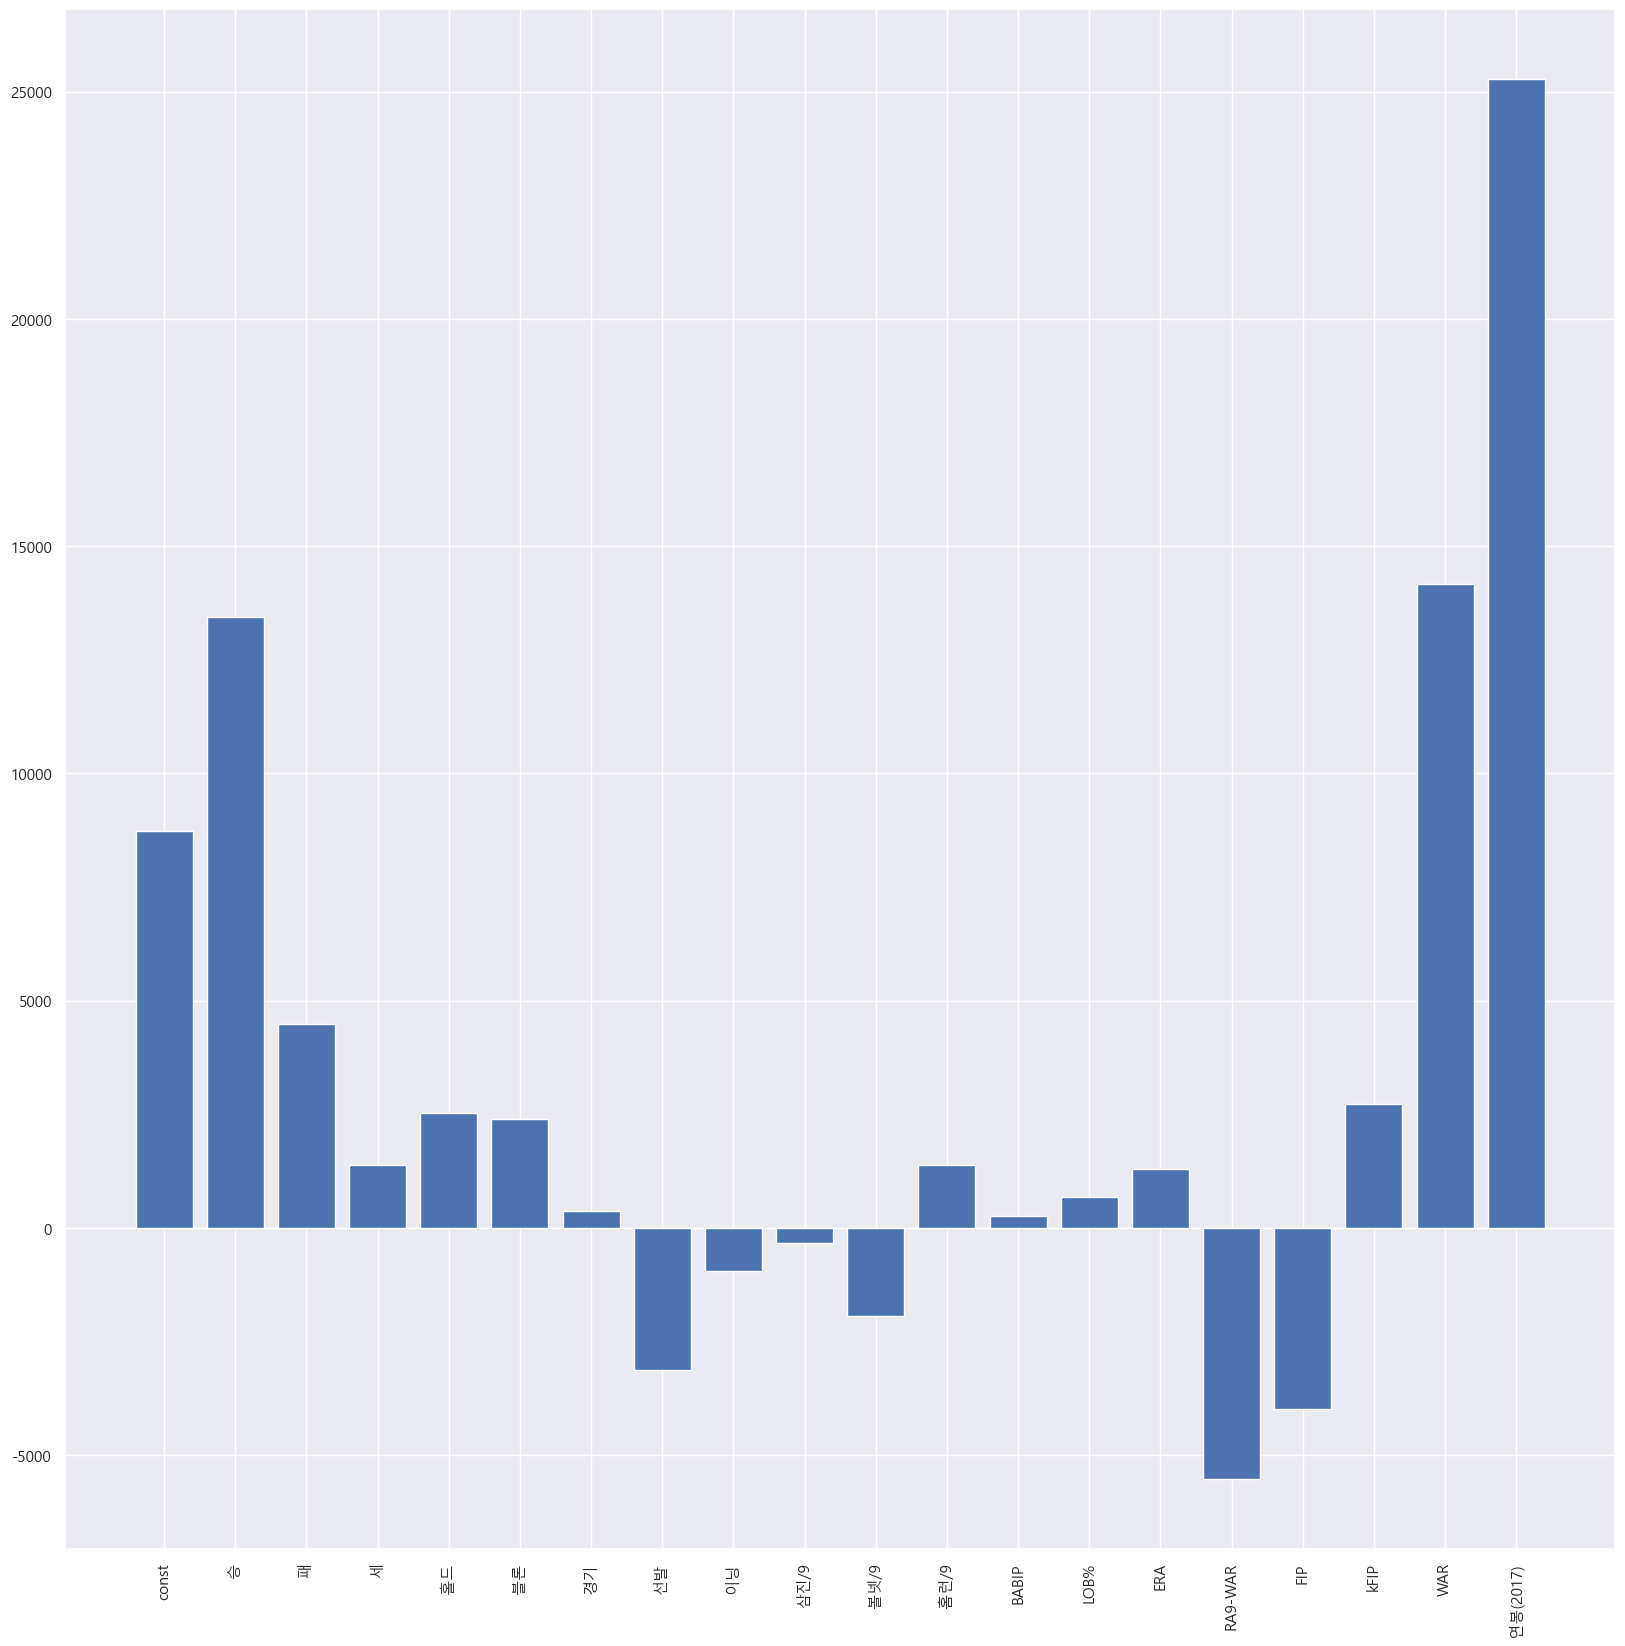

In [222]:
## 평가서 그래프로 출력
plt.figure(figsize = (20,20))
# 회귀 계수 - 기울기
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명 : 특성이름
x_labels=model.params.index.tolist()

# 그래프 출력
plt.bar(x_labels,coefs_series)
plt.xticks(rotation=90)


In [220]:
picher_y_df.columns
train_input = train_input.iloc[:,1:]